<a name='TableOfContents'></a>

# Notes:
1. Please run the first two cells as is to load libraries
2. The code guides and output will help you develop your code
3. in case your results are not matching the previous output (left for you) this could be due to randomization and you should not worry about them
4. Most of the code is ready,  all you need to do in fill in some parts of the codes to complete

# loading Libraries

In [1]:
#  Essential Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# For data
from sklearn import datasets
from sklearn.datasets import make_blobs

# For data processing
from sklearn.preprocessing import StandardScaler

# For modeling
from sklearn.cluster  import KMeans

# For evaluation
from sklearn.metrics import jaccard_score, adjusted_rand_score, silhouette_score


# Other
import sklearn.metrics.pairwise as pw
# from math import factorial
# from itertools import combinations


In [3]:
# stopping warnings
import warnings
warnings.filterwarnings('ignore')

***************

# Exercise 1 

1. **Generate Data using Scikit learn Library**

Scikit-learn has a **datasets** package that helps us generate and fetch data. Such created or fetched data can be used to evaluate our ML models. For generated data, we can control the size of the dataset (n_sample s and n_features) as well as the statistical properties of the data. In part of this exercise, we want to practice generating blobs, circles, and moons datasets.
1.	Generate a dataset with 5 groups, each group has 20 samples(dataset1). 
2.	Generate a dataset with 5 groups, each with 50 samples and each group has its own spread. 
3.	Generate a dataset with two inscribed circles of data points, each data circle has 20 data points.
4.	Repeat task 3 and adjust the parameters that enforce the inner circle to move towards the outer circle. 
5.	Generate a moon dataset, with 30 samples per group. Moreover, study the noise parameter. 
6.  Finally, for each generated dataset visualize the results using scatter plot



[top](#TableOfContents)

In [4]:
# First load the needed packages. (Note: it's already load it in the top cell)
from sklearn import datasets


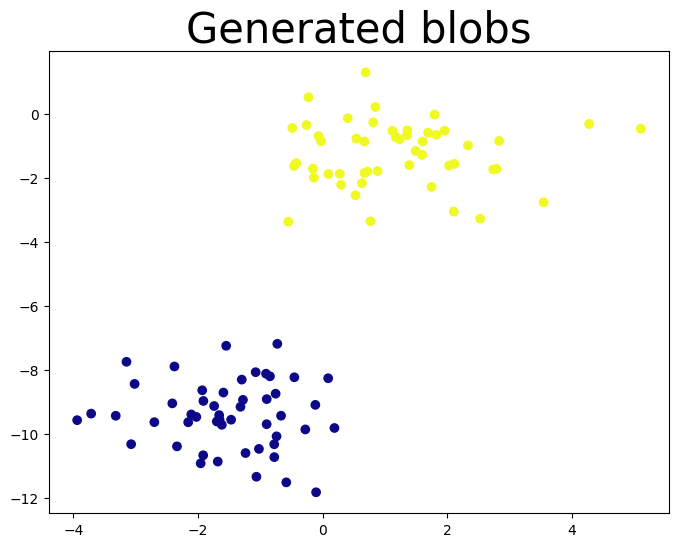

In [5]:
# Task 1: Done for you
X, y = datasets.make_blobs(n_samples=100,         # 5 groups with 20 samples each that make the total points =100
                               centers=2,         # determine groups to be generated
                               n_features=2,      # determines how many features per sample
                               cluster_std = 1.0, # determines the spread per each generated group
                               shuffle = True,    # the data retuned will be shuffled or not
                               random_state=2     # for reproducibility use the same number
                               )

# scatter plot the data and use labels to color each group's samples 
# this line sets the size of the plot
plt.figure(figsize=(8,6))
# this line scatter plot the data, c=y is the color paramter, and y is the labels
plt.scatter(X[:,0],X[:,1], c = y, cmap='plasma')
#sets the title 
plt.title('Generated blobs', fontsize=30)
#you may set the x coordinate and y coordinate labels to X and y

# finally, to show the plot
plt.show()

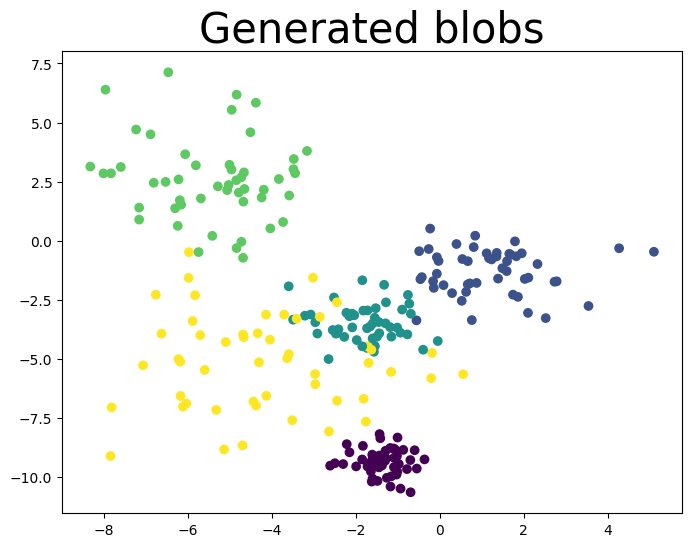

In [6]:
## Task2 

Xb, yb = datasets.make_blobs(n_samples= 250 ,       
                               centers= 5,         
                               n_features= 2,      
                               cluster_std=[0.5,1,0.8,1.5,2  ],  # to set different spread you need a list
                               shuffle = True,    
                               random_state=2
                              )

# plot the the generated data
plt.figure(figsize=(8,6))
plt.scatter(Xb[:,0],Xb[:,1], c =yb, cmap='viridis')
plt.title('Generated blobs', fontsize=30)
plt.show()


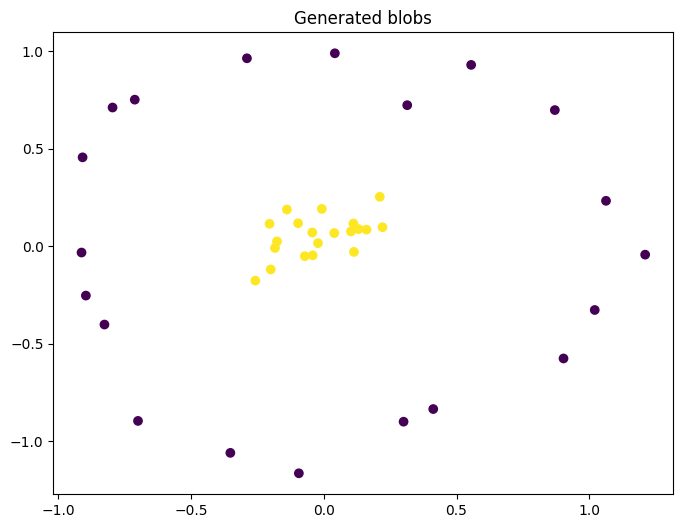

In [7]:
# Task 3
Xc, yc = datasets.make_circles(n_samples= 40,         
                                 noise=  0.1 ,   # a value (0 to 1): it sets how data points disturbed 
                                 factor= 0.1,    # a value btw (0 to 1): how far the inner data from the outer group
                                 shuffle=True, 
                                 random_state=2
                                 )

# plot the the generated data
plt.figure(figsize=(8,6))
plt.scatter(Xc[:,0],Xc[:,1], c =yc, cmap='viridis')
plt.title('Generated blobs')
plt.show()


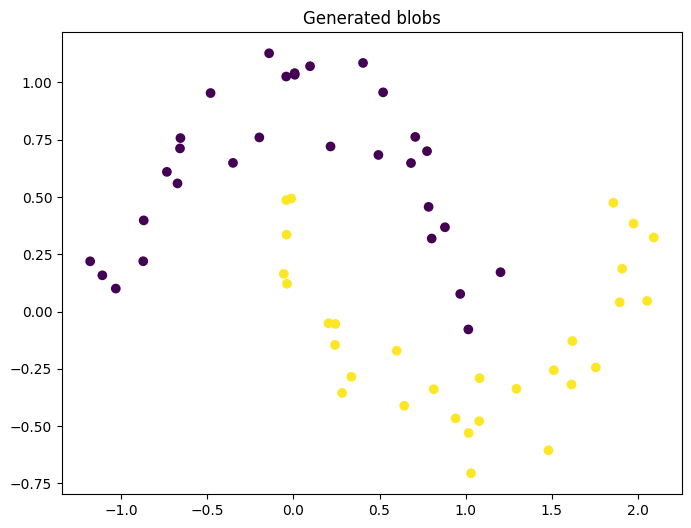

In [8]:
# Task 4
Xmn, ymn = datasets.make_moons(n_samples= 60, 
                               noise=0.1  ,            
                               shuffle=True, 
                               random_state=2)


# plot the the generated data
plt.figure(figsize=(8,6))
plt.scatter(Xmn[:,0],Xmn[:,1], c =ymn, cmap='viridis')
plt.title('Generated blobs')
plt.show()


<a name='Question1P2'></a>

2. **Load Benchmark dataset from Scikit learn**

In this part we want to load sklearn datasets. Such data are useful to learn and test ML algorithms. Let us load and explore three different datasets. 

- Load Iris dataset and find out the following:
    - Total number of samples 
    - How many features the dataset has
    - what is the target variable 
    - which ML methodology we can apply on this dataset (supervised, unsupervised)
    
- Load the Diabetes dataset and find out the following:
    - Total number of samples 
    - How many features the dataset has
    - what is the target variable 
    - which ML methodology we can apply on this dataset (supervised, unsupervised)
    
- Fetch the news group dataset from sklearn
    - Total number of samples 
    - what is the target variable 
    - which ML methodology we can apply on this dataset (supervised, unsupervised)


In [9]:
# 1. iris dataset: 
# use datasets library to get the iris data
irisdata = datasets.load_iris()

# extract data only from irisdata 
X_iris = irisdata.data

# extract targets values only irisdata
y_iris = irisdata.target

# set information required as dict
datainfo = {'total samples': X_iris.shape[0] , 
           'total features': X_iris.shape[1]       ,
           'total target labels':set(y_iris)    } # hint: you can use set() to unique values

# let us show the results using loop
for key in datainfo:
    print(key,':', datainfo[key])

# list features names from the irisdata
i =1
print('Feature names')
for feat in irisdata.target_names :                 # complete this line with feature names
    print(i, '. ', feat)
    i += 1
    

total samples : 150
total features : 4
total target labels : {0, 1, 2}
Feature names
1 .  setosa
2 .  versicolor
3 .  virginica


Since the targets are discrete, the problem is **...**

In [10]:
# diabetes dataset

# complete the following code
diabetesdata = datasets.load_diabetes()

# extract data only from diabetesdata 
X_diabetes = diabetesdata.data

# extract targets values only from diabetesdata
y_diabetes = diabetesdata.target


# set information required as dict
datainfo = {'total samples':X_diabetes.shape[0]  , 
           'total features': X_diabetes.shape[1]      ,
           'total target labels':[min(y_diabetes), max(y_diabetes)]    } # hint: get the min and max of the targets

# let us show the results using loop
for key in datainfo:
    print(key,':', datainfo[key])
    
# list features names from the irisdata
print('Feature names')
i=1
for feat in diabetesdata.feature_names   :            # complete this line with feature names
    print(i, '. ', feat)
    i+=1

total samples : 442
total features : 10
total target labels : [25.0, 346.0]
Feature names
1 .  age
2 .  sex
3 .  bmi
4 .  bp
5 .  s1
6 .  s2
7 .  s3
8 .  s4
9 .  s5
10 .  s6


Since the targets are continuous, the problem is **...**

In [11]:
# newsgroups dataset
# this dataset is text, you may not be able to use it directly, but some preprocessing/feature extraction are required. 
data20news = datasets.fetch_20newsgroups()

# extract data only  from data20news 
X_data20news = data20news.data

# extract targets values only from data20news 
y_data20news = data20news.target


# set information required as dict
datainfo = {'total samples': len(X_data20news)  , # the data in a form of a list, so len will return the number of items
            'total target labels':set(y_data20news)    }      # hint: use set here

# let us show the results using loop
for key in datainfo:
    print(key,':', datainfo[key])
    
# list features names from the irisdata
print('Feature names')
i=1
for feat in data20news.target_names   :            # complete this line with feature names
    print(i, '. ', feat)
    i+=1

total samples : 11314
total target labels : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Feature names
1 .  alt.atheism
2 .  comp.graphics
3 .  comp.os.ms-windows.misc
4 .  comp.sys.ibm.pc.hardware
5 .  comp.sys.mac.hardware
6 .  comp.windows.x
7 .  misc.forsale
8 .  rec.autos
9 .  rec.motorcycles
10 .  rec.sport.baseball
11 .  rec.sport.hockey
12 .  sci.crypt
13 .  sci.electronics
14 .  sci.med
15 .  sci.space
16 .  soc.religion.christian
17 .  talk.politics.guns
18 .  talk.politics.mideast
19 .  talk.politics.misc
20 .  talk.religion.misc


This data is not ready for modeling, it may need some feature engineering before passing it to machine learning

******************

# Exercise 2 ( Kmeans Clustering)


Let's perform clustering using Kmeans algorithm on the **blob** data generated in the pervious exercise. 

**Tasks:**
1. Load the Kmeans model from cluser package 
2. Initiate the Kmeans model with required parameters such as K=2 (n_clusters)
2. Fit the model to get results
2. Use scatter plot to show clustering results by coloring each point with its label from the clustering result (y_hat). 

**Note:** You may checkout n_clusters to 3, 4, and 5.  


[Return to Table of Contents](#TableOfContents)

In [12]:
# First we need to import the kmeans from cluster package
from sklearn.cluster  import KMeans

In [13]:
# initiate the KMeans model with 2 clusters, complete below
k_means = KMeans(  n_clusters=2   )  # note: default values will be applied if left empty 

# fit the configure model using the previoud data X
k_means.fit( X  ) # fill in between brackets

# Get the estimated label (y_hat) of each point 
try:
    y_hat = k_means.predict( X ) # fill in between brackets
    # if the above line generates an error, the following should work
except:
    y_hat =k_means.fit_predict(X)

**In Case of the following Error** 
'AttributeError: 'NoneType' object has no attribute 'split'

It could be due to the libraries version conflict, pytorch or other
one solution is to upgrade threadpoolctl to version >3, using the following command:
pip install --upgrade threadpoolctl

In [14]:
import sklearn as sk
sk.__version__

'1.4.2'

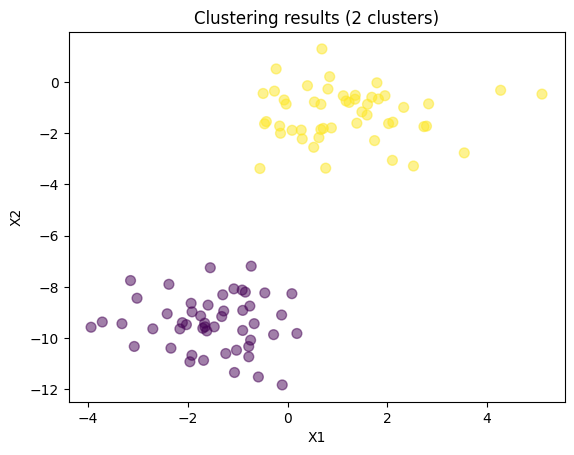

In [15]:
# 2.Use scatter plot to show clustering results labeled by y_pred.

plt.scatter (X[:,0], X[:,1], c=y_hat, facecolor ='none', s=50,  alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clustering results (2 clusters)')
plt.show()



Kmeans identified two clusters as configured. The first is the top yellow cluster and another at the bottom of the plot above

[Return to Question List of Tasks](#Question2)

******************

# Exercise 3  (Evaluation External Index)


The blob dataset used in Exercise 2 was generated using Sklearn. This dataset has labels already which we can use as our ground truth.  In this exercise, we want to validate our clustering results using an external index metric (homogeneity score). If the results are not satisfactory, we can repeat the clustering and improve.     



[Return to Table of Contents](#TableOfContents)

In [16]:
# we need to load the metric first
from sklearn.metrics import homogeneity_score

# what want to find out how homogenious our results compared to ground-truth
score = homogeneity_score(y, y_hat)
print('Homogenity of the clustering results is (%0.2f)'% score)

Homogenity of the clustering results is (1.00)


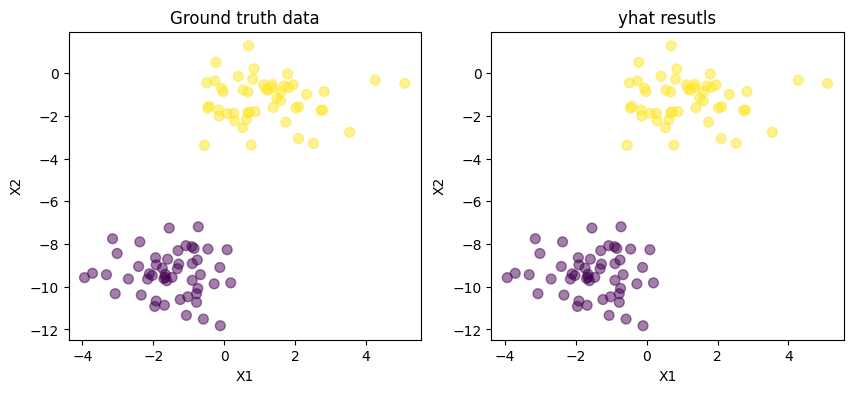

In [17]:
# To be much clearer, we can plot data and color them using the new labels
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.scatter (X[:,0], X[:,1], c=y, facecolor ='none', s=50,  alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Ground truth data")
plt.subplot(1,2,2); plt.scatter (X[:,0], X[:,1], c=y_hat, facecolor ='none', s=50,  alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("yhat resutls")
plt.show()

The above results showed 31% homogeneity between the ground-truth and clustering results. How can we make it better?

In [18]:
# You may use these cells to improve results above


[Return to Question List of Tasks](#Question3)

<a name='Question4'></a>

# Exercise 4 (Evaluation: Internal Index)



We can look also on the internal index for the above clustering results as an exercise. To do that, we can compute the WSS and BSS and compare them. If BSS is greater than WSS, then that is a good indication of good clustering

1. Within Sum of Squares (WSS) also called inertia, what do you think about the computed value? 
2. Between Sum of Squares (BSS), What is the relation between WSS and BSS?
3. Silhouette index 



[Return to Table of Contents](#TableOfContents)

In [19]:
# 1 and 2 wss and bss

# let us use the k = 2 and compute the wss and bss
k_means = KMeans(  n_clusters=2   )  # set k = 2
k_means.fit( X  ) # fit the model
y_hat = k_means.predict( X )  # predict the new labels

# so no need to code the equation for it
wss = k_means.inertia_

# The BSS is not provided and we can code the equation to compute it
# BSS = Sum(|Ci| * (M - mi)^2 )
#where Ci is the cordinality of cluster i and mi is the mean of cluster i and M is the mean of the whole data

# let me walk you through
# stp1: get the mean of the data
M = np.mean( X , axis=0) 

# stp2: let's build a loop to compute bss
bss = 0 

# for each label in the prediction
for lbl in set(y_hat):
    # get size of that group label in c
    c = len(y_hat[y_hat==lbl])
    
    # compute mean of that group of the data 
    m = np.mean(X[y_hat==lbl,:], axis=0)
    
    # apply in bss equation, the += will accumulate results of each group
    bss += c * ((M-m)**2 ).sum()

    
print('WSS=%0.2f'% wss)
print('BSS=%0.2f'% bss)

WSS=224.31
BSS=1844.61


**Notes:**
1. If your results are not the same that may be due to your generated data is different, or the results produced by the Kmeans is different due to Kmeans initlization 
2. The above results indicates a good clustering results ?? however, it doesn't look good with homogeneity score!

In [20]:
# 3. Silhouette index
# Silhouette score using scikit learn 
from sklearn.metrics import silhouette_score
print ('silhouettee score =%0.2f '% silhouette_score(X, y_hat))

silhouettee score =0.78 


###  Conclusion 

write your observations 


[Return to Question List of Tasks](#Question4)

*********************

# Exercise 5 (Estimate number of clusters)



The Elbow method is used to estimate the right number of clusters for a given dataset. The turning point that forms an elbow shape is usually used as a good value for K in K-means Clustering. The following Figure shows a curve with an elbow shape. 

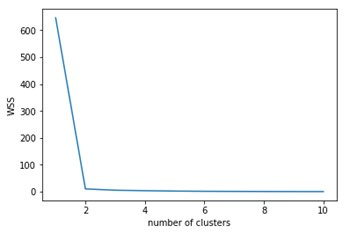

Given the previously used data, write a python code that performs K-means clustering repeatedly on the data using different K values each time. Then, plot K values against computed WSS (inertia) in each iteration.

[Return to Table of Contents](#TableOfContents)

In [21]:
# define a function to find best K
# input: data X
# output list of wss and different value for K
# hint: kmeans has an output attribute as inertia_
def Find_K_Kmeans(X, ks):
    
    # should go from 1 cluster to n number of clusters where WSS will be zero
    WSS = []
    for k in range(1,ks):
        # initiat K-means
        kmeans = KMeans(n_clusters=k )
        kmeans.fit(X)
        d      = kmeans.inertia_
        WSS.append(kmeans.inertia_)
    
    # you code should return two values
    return WSS
  

In [22]:
# Call your functions to compute the wss
# set a value for the list of k to be tested
klst = 10
# call your developed function above that should return list of wss
wss = Find_K_Kmeans(X, klst)  

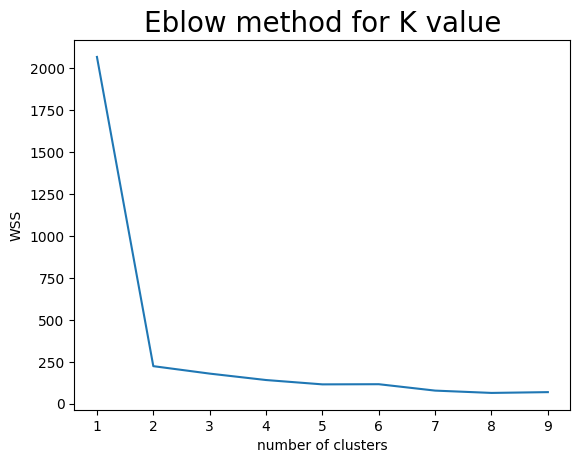

In [23]:
# plot the wss in (y-axis) and klst(x=axis) and figureout what is the optimal k?
plt.plot(range(1,klst), wss)
plt.xlabel('number of clusters')
plt.ylabel('WSS')
plt.title('Eblow method for K value', fontsize=20)
plt.show()

**Conclusion:**
write your observation and conclusion

**Note:** we can use yellowbrick library to visualize the elbow method. This library is not installed by default in local machines, so you can install it as follows:
- conda install -c districtdatalabs yellowbrick
- for documentation: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

- Unfortunately, if you have the latest version of Sklearn, the yellowbrick library won't work properly due to a bug. In this case, you can install an older version 0.22 (conda install scikit-learn=0.22) **not recommended**

In [24]:
# import sklearn
# if sklearn.__version__[0] == '0': 
#     print('yellowbrick may work correctly.. ')
#     print('if you are in Google colab, it most likely that yellowbrick is install and ready')
#     print('first import it to check if it is exist in your system')
# else:
#     print('No need to install yellowbrick, use matplot to visualize the elbow method')
#     print('version 1.0.2 was debuged and should work fine')

In [25]:

import sklearn
if sklearn.__version__[0] != '1':
    from yellowbrick.cluster import KElbowVisualizer
    Elbow_M = KElbowVisualizer(KMeans(), k=10)
    Elbow_M.fit(X)
    Elbow_M.show()
    plt.show()
else:
    print ('The KElbowVisualizer require sklearn version 0.22 or older, it has a bug with the new version!')

The KElbowVisualizer require sklearn version 0.22 or older, it has a bug with the new version!


sklearn version: 1.4.2


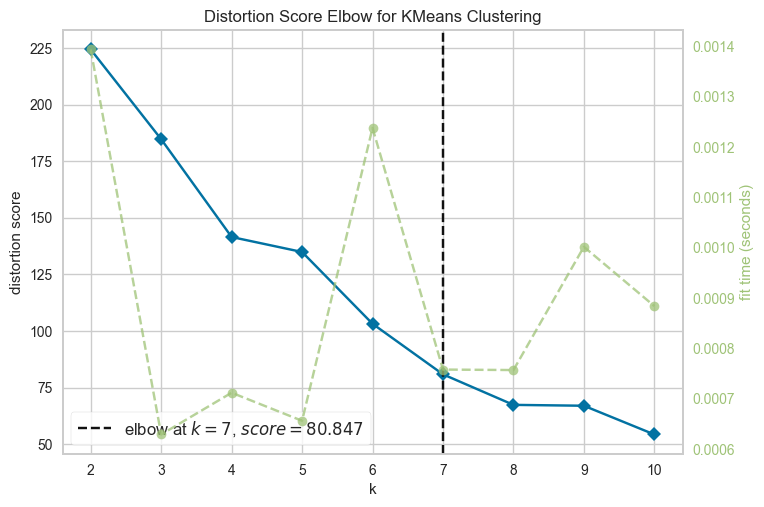

In [26]:
from yellowbrick.cluster import KElbowVisualizer
print ('sklearn version:', sklearn.__version__)
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()
plt.show()

# Exercise 6  (Determine value of K using Silhouette score)


As WSS is already considered in silhouette score and our target is to have the highest score, we can keep track of silhouette score and find K that maximum the silhouettee score. 

We can repeat our work above to find the best K using silhouette score
1. develop a function that builds several kmeans models and return silhouette scores of each model
2. each model is created using different K value
3. select the best K

**Note** Use the same dataset


[Return to Table of Contents](#TableOfContents)

In [27]:
# develop a  function
# define a function to find best K
# input: data X
# output list of sil 
def Find_K_Silhouette(X, ks):
    
    # should go from 1 cluster to n number of clusters where WSS will be zero
    Sil = []
    for k in range(2,ks):
        kmeans = KMeans(n_clusters = k )
        y_hat = kmeans.fit_predict(X)
        Sil.append(silhouette_score(X, y_hat))
    return Sil

In [28]:
# call the function
# set a value for the list of k to be tested
klst = 10
# call your developed function above that should return list of wss
Sil = Find_K_Silhouette(X, klst)  

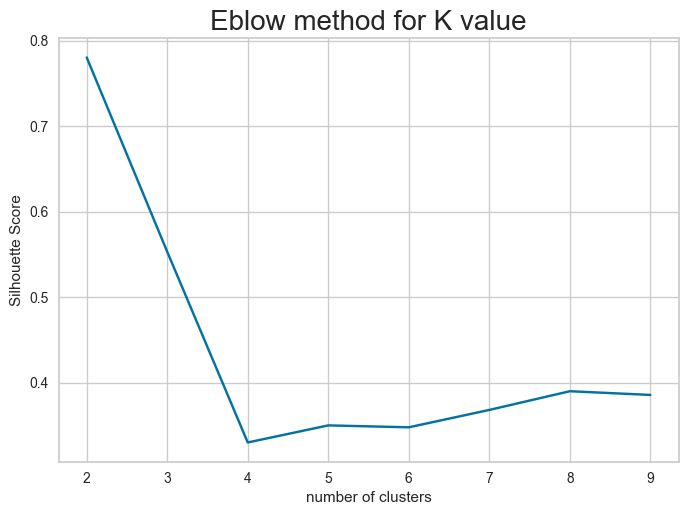

In [29]:
# plot the results
plt.plot(range(2,klst), Sil)
plt.xlabel('number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Eblow method for K value', fontsize=20)
plt.show()

In [30]:
# write your conclusions
# We can clearly notice four clusters in the dataset

*************

# Exercise 7 (Kmeans Ability)

In the previous exercises, we performed kmeans clustering on blob dataset with almost similar densities. In this exercise, we want to figure out the ability of Kmeans in different situations such as:
1. How good Kmeans is in clustering data with various densities or skwed data
2. How good Kmeans in clustering circles dataset
3. How good Kmeans in clustering moons datasets



Consider the following datasets of two variables X1, and X2:
1. **Challenge 1 (variations):** Create a dataset with 5 clusters, and each cluster has different standard deviation; std = {1, 0.2 ,3 ,0.5, 2}. Then, use scatter plot to show the data 
4. **Challenge 2 (stretched  datasets):** Generate another dataset with 2 features and 2 clusters. Use the anisotropic transformation (Note: copy the code from the slides) to make the two clusters stretched. Then, repeat clustering using Kmeans. Observe the results. 
5. **Challenge 3 (circles and moons datasets):** Create circles and moons datasets. Then, use silhouette method to determine a value for K. After that, perform clustering using identified **K** to predict labels using Kmeans. Observe the results. 

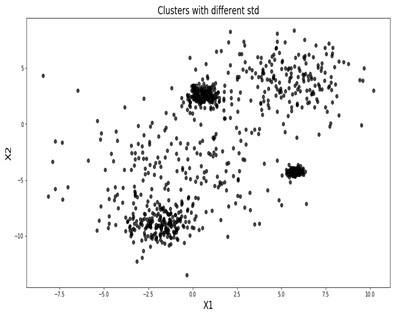



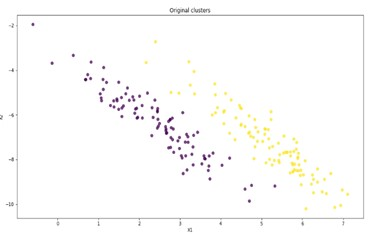

[Return to Table of Contents](#TableOfContents)

## challenge 1(variations):

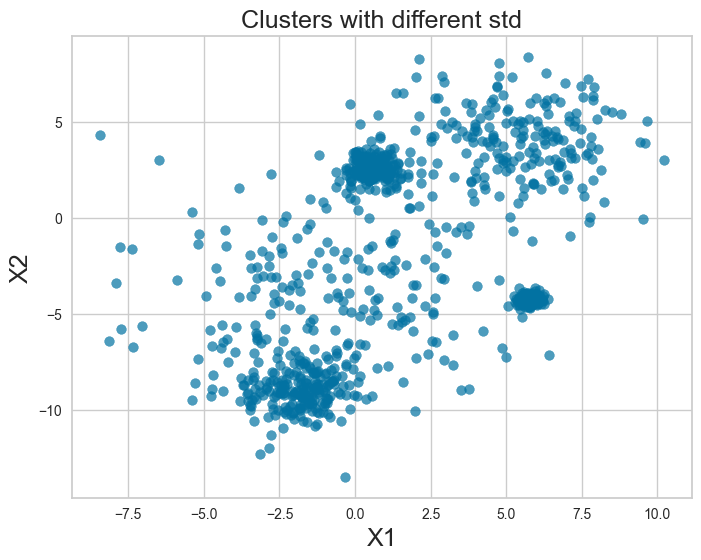

In [31]:
# let us generate the data with various densities and viz it

# using blobs 1000 samples with 5 groups different densities
Xbd, ybd = datasets.make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std=[1,0.2,3,0.5,2] , random_state=40)

# show the data
plt.figure(figsize=[8,6])
plt.scatter (Xbd[:,0],Xbd[:,1], alpha = 0.7 )
plt.xlabel('X1',fontsize=18)
plt.ylabel('X2',fontsize=18)
plt.title('Clusters with different std',fontsize=18)
plt.show()

In [32]:
# Build kmeans model with an optimal K and compute its silhouette score
# note: use the previous steps we developed above

# start coding here

# call the function
# set a value for the list of k to be tested
klst = 10
# call your developed function above that should return list of wss
Sil = Find_K_Silhouette(Xbd, klst)  


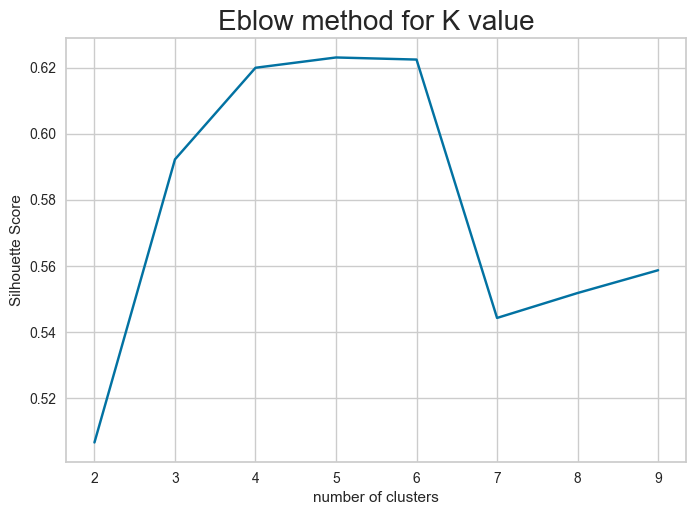

In [33]:
# scatter plot results with colors to indicate formed clusters

plt.plot(range(2,klst), Sil)
plt.xlabel('number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Eblow method for K value', fontsize=20)
plt.show()

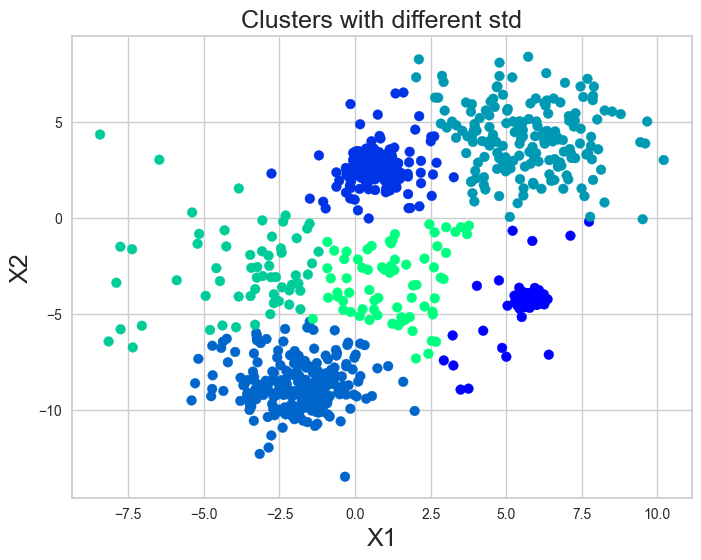

In [34]:
# from the figure above, we notice six clusters
k = 6
kmeans = KMeans(n_clusters = k )
y_hat = kmeans.fit_predict(Xbd)

# show the data
plt.figure(figsize=[8,6])
plt.scatter (Xbd[:,0],Xbd[:,1],  c= y_hat, cmap='winter')
plt.xlabel('X1',fontsize=18)
plt.ylabel('X2',fontsize=18)
plt.title('Clusters with different std',fontsize=18)
plt.show()

**Concluions**

write you comments and observation

*************

## Challenge 2 (stretched  dataset)
[Return to Question 8](#Question8)

In [35]:
# Let us generate streched data 
# normal blob data
Xbs, ybs = datasets.make_blobs (n_samples=200, centers =2, n_features=2, cluster_std=1.5, random_state=40)

# transform parameters
transformation = [[0.60, -0.63], [-0.40, 0.85]]

# Dot product the generated data points to have the new stretched  dataset
Xbs = np.dot(Xbs, transformation)

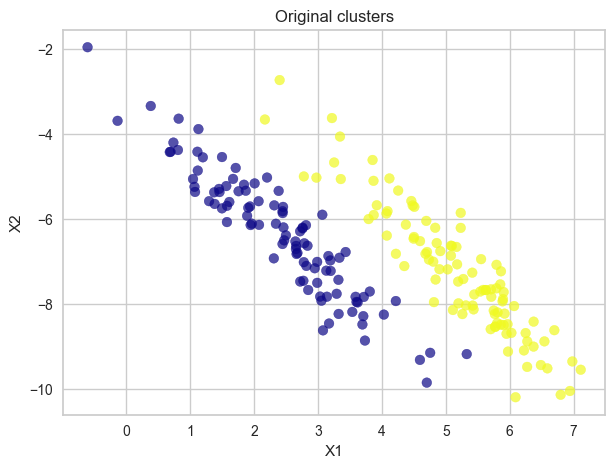

In [36]:
#plot results 
plt.figure(figsize=[7,5])
plt.scatter (Xbs[:,0],Xbs[:,1], c= ybs, alpha = 0.7, cmap='plasma' )
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original clusters')
plt.show()

In [37]:
# Build kmeans model with an optimal K and compute its silhouette score
# note: use the previous steps we developed above

# start coding here




In [38]:
# scatter plot results with colors to indicate formed clusters


**Concluions**

write you comments and observation

**what do you think about the results??**

## Challenge 3 (Circles and Moons Dataset)
[Return to Question 8](#Question8)

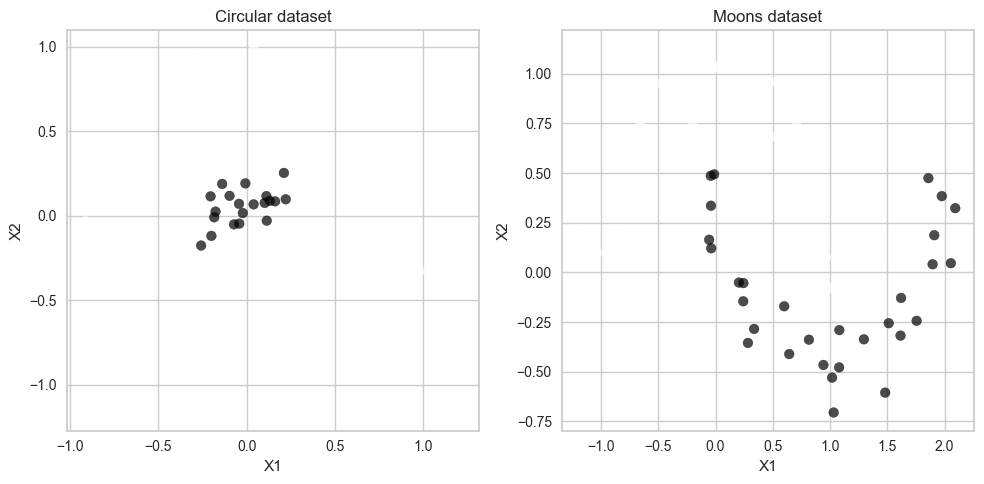

In [39]:
# The data are already generated in exercise 1

#plot results 
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.scatter (Xc[:,0],Xc[:,1], c= yc, alpha = 0.7 )
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circular dataset')
plt.subplot(1,2,2)
plt.scatter (Xmn[:,0],Xmn[:,1], c= ymn, alpha = 0.7 )
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Moons dataset')
plt.tight_layout()
plt.show()

In [40]:
# Build kmeans model with an optimal K and compute its silhouette score
# note: use the previous steps we developed above

# start coding here




In [41]:
# scatter plot results with colors to indicate formed clusters


**Concluions**

write you comments and observation

**what do you think about the results??**

******************

#  Exercise 8 (Dendrograms)

Using the following data of two features x1and x2, study the behavior of linkages methods (single,
complete, average, ward) by plotting the dendrograms of each method’s result.

|Points| x1| x2|
|:---|:---|:---|
|P1| 0.5| 0.5|
|P2| 0.5| 2|
|P3| 5| 5|
|P4| 3| 4|
|P5| 4| 4|
|P6| 3| 3.5|

**Tasks:**
1. Order the points as they got grouped early? Use the linkage matrix
|Points| Order| 
|:---|:---|
|P1| | 
|P2| | 
|P3| | 
|P4| | 
|P5| | 
|P6|  | 

2. In case of three clusters, which points are grouped together?
|Cluster| Points| 
|:---|:---|
|Cluster 1| (  .........       ) | 
|Cluster 2 | (    .........      ) | 
|Cluster 3| (   .........         ) |  



**Note:** load both packages linkage and dendrogram from **scipy.cluster.hierarchy**

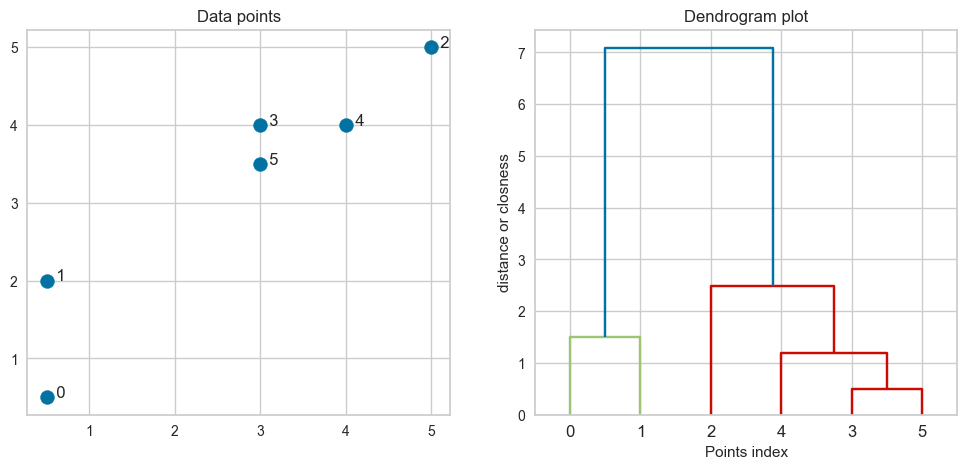

In [42]:
# load the linkage
from scipy.cluster.hierarchy import dendrogram, linkage

# make numpy array with the data from the question description
data    = np.array([[0.5,0.5], [0.5,2], [5,5], [3,4], [4,4], [3, 3.5]])

# Use linkage function and make sure 'ward' is used
linkage_matrix = linkage(data, 'ward')    # complete the code here 

# Plot the dedrogram using the linkage_matrix
plt.figure(figsize=(12,5))

# left part - data points
plt.subplot(1,2,1)
plt.scatter(data[:,0], data[:,1], s=100)
plt.title('Data points')
i = 0
for d in data:
    
    plt.annotate(' '*2 + str(i), (d[0], d[1]) )
    i+=1

# right plot - dendrogram
plt.subplot(1,2,2)
dendrogram( linkage_matrix  ) # complete the code here
plt.title('Dendrogram plot')
plt.xlabel('Points index')
plt.ylabel('distance or closness')
plt.show()

In [43]:
# from the linkage matrix we can understand the order in which how points got grouped
# show the linkage 

# convert them to dictionary using dict(enumerate () )
datadic = dict(enumerate(data.tolist()))

# print the dictionary to follow the points and their indecies
for key, val in datadic.items():
    print(key, val)
print()
# If we cut at 1.5, how many clusters we will have??
print ('linkage matrix:'); 
print(linkage_matrix)

0 [0.5, 0.5]
1 [0.5, 2.0]
2 [5.0, 5.0]
3 [3.0, 4.0]
4 [4.0, 4.0]
5 [3.0, 3.5]

linkage matrix:
[[3.         5.         0.5        2.        ]
 [4.         6.         1.19023807 3.        ]
 [0.         1.         1.5        2.        ]
 [2.         7.         2.49165273 4.        ]
 [8.         9.         7.08578389 6.        ]]


*Answer:*
1. Order the points as they got grouped early? Use the linkage matrix
|Points| Order| 
|:---|:---|
|P1| 3 | 
|P2| 3 | 
|P3| 4 | 
|P4| 1 | 
|P5| 2 | 
|P6| 1 | 

2. In case of three clusters, which points are grouped together?
From the plot below using **complete, centroid, average linkages**, we have the following 3 clusters
|Cluster| Points| 
|:---|:---|
|Cluster 1| (  1, 2       ) | 
|Cluster 2 | (    3      ) | 
|Cluster 3| (   4, 5, 6         ) |  


2. In case of three clusters, which points are grouped together?
From the plot below using [**single linkages**](#singleLinkage), we have  no 3 clusters !!




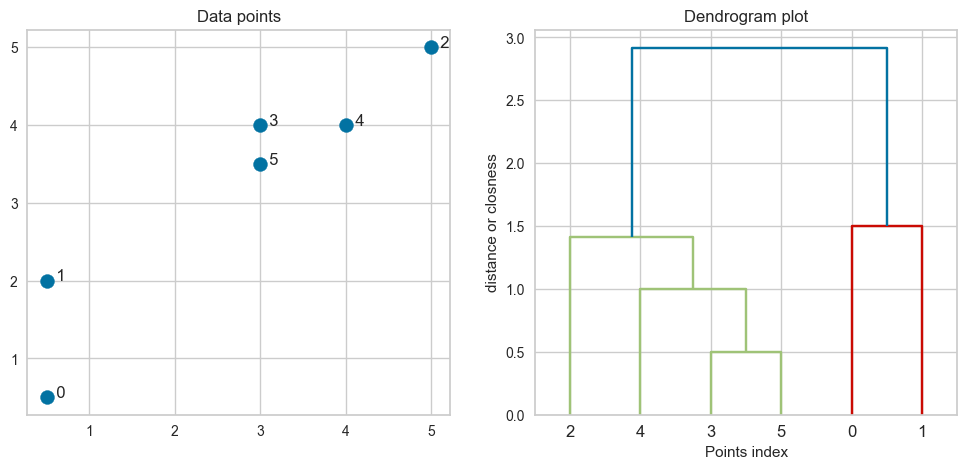

In [44]:
# Repeat the above exercise using single link instead of ward!
# is there any differences

# Use linkage function and make sure 'ward' is used
linkage_matrix = linkage(data, 'single')    # complete the code here 

# Plot the dedrogram using the linkage_matrix
plt.figure(figsize=(12,5))

# left part - data points
plt.subplot(1,2,1)
plt.scatter(data[:,0], data[:,1], s=100)
plt.title('Data points')
i = 0
for d in data:
    plt.annotate(' '*2 + str(i), (d[0], d[1]) )
    i+=1

# right plot - dendrogram
plt.subplot(1,2,2)
dendrogram(  linkage_matrix             ) # complete the code here
plt.title('Dendrogram plot')
plt.xlabel('Points index')
plt.ylabel('distance or closness')
plt.show()

**Note** you may study the effect of different linkages 

# Exercise 9 (Perform Hierarchical Clustering)

Let us perform Agglomerative Clustering on our previous blob dataset X,y. 

1. Then, perform hierarchical clustering using different linkages (ward, complete, average)
2. we can use denderogram to figure out how many clusters or what is K
    

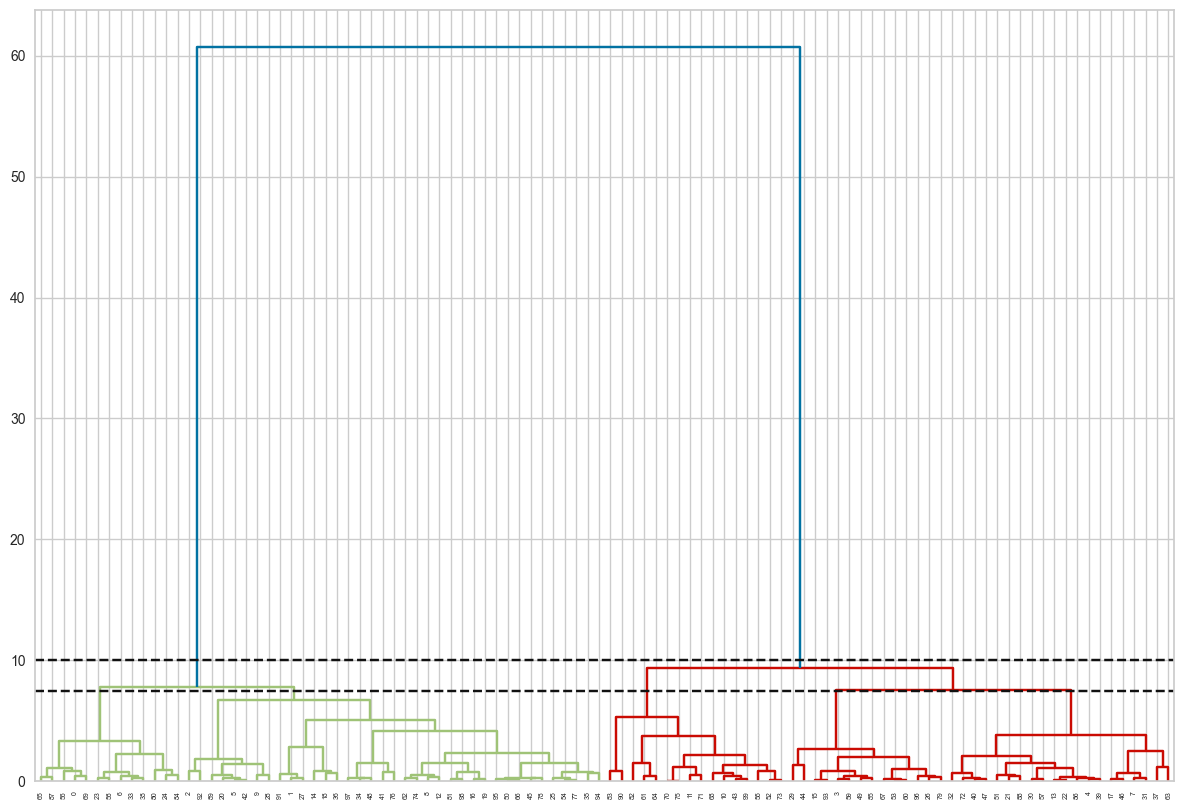

In [45]:
# let us try AC with 100 point dataset X, y

# use 'ward'linkage to build the dendrogram
linkage_array =  linkage(X, 'ward')# complete the code here
dendrogram( linkage_array   )# complete the code here
plt.axhline(10, color='k', linestyle='--')
plt.axhline(7.5, color = 'k', linestyle='--')
# larger and tigher plot
plt.tight_layout(rect=(0,0,1.5,1.5))
plt.show()

 From the plot, our cut can be defined on either 7.5 or 10.
 In case of 10, we end-up with 5 clusters so K = 5
 In case of cut on 7, we end-up with 6 clusters so K = 6

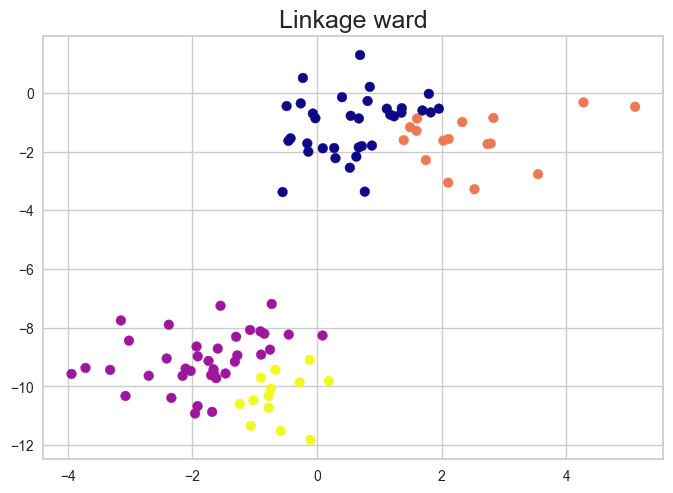

In [46]:
# load the Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# initiate and configure the agglomerative estimator with clusters = 5 and linkage = ward. then fit it with blobs dataset
ward = AgglomerativeClustering(n_clusters = 4, linkage='ward').fit(X)

# find the predicted labels
y_hat = ward.fit_predict(X)

# plot the data with the predicted labels using Hierarchical Clustering
plt.scatter(X[:,0], X[:,1], c = y_hat, cmap='plasma')
plt.title("Linkage ward", fontsize=18)
plt.show()

**Compare with KMeans results before !!**

#  Exercise 10 (Hierarchical Clustering Ability)


In this exercise, we want to check the performance of AC clustering on the challenges set as before.  
Consider the following datasets of two variables X1, and X2:

1. Challenge 1 (variations): use AC to cluster 5 groups using  the pervious dataset with 5 clusters and  different standard different spreads. Then, evaluate the results using the silhouette score and visualization.
1. Challenge 2 (stretched datasets): use AC on the previous stretched dataset to group them into 2 groups. Then, evaluate the results using the silhouette score and visualization.
1. Challenge 3 (circles and moons datasets): use AC to cluster circles and moons datasets into to groups. Then, evaluate the results using the silhouette score and visualization.

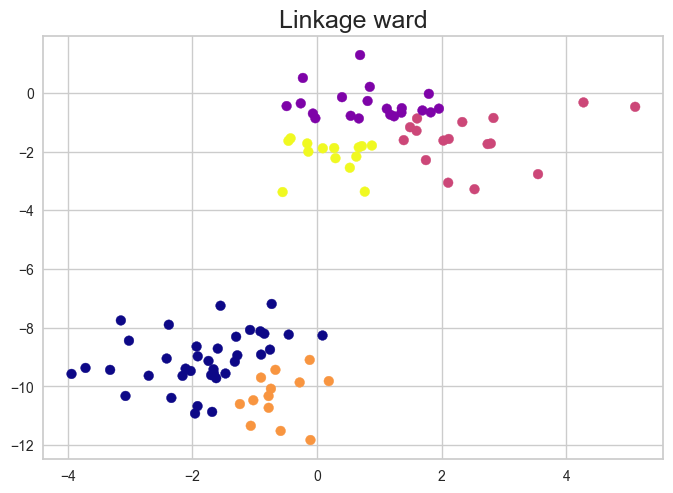

In [56]:
# challenge 1 
# initiate and configure the agglomerative estimator with clusters = 5 and linkage = ward. then fit it with blobs dataset
ward = AgglomerativeClustering(n_clusters = 5, linkage='ward').fit(X)
# start coding here
# find the predicted labels
y_hat = ward.fit_predict(X)

# plot the data with the predicted labels using Hierarchical Clustering
plt.scatter(X[:,0], X[:,1], c = y_hat, cmap='plasma')
plt.title("Linkage ward", fontsize=18)
plt.show()

In [48]:
# challenge 2 

# start coding here


In [49]:
# challenge 3 

# start coding here


#  Exercise 11 (DBSCAN)

In this exercise, we want to check the performance of DBSCAN clustering on the challenges set before for AC and Kmeans.  
Consider the following datasets of two variables X1, and X2:

1. Challenge 1 (variations): use DBSCAN to cluster 5 groups using  the pervious dataset with 5 clusters and  different standard different spreads. Then, evaluate the results using the silhouette score and visualization.
1. Challenge 2 (stretched datasets): use DBSCAN on the previous stretched dataset to group them into 2 groups. Then, evaluate the results using the silhouette score and visualization.
1. Challenge 3 (circles and moons datasets): use DBSCAN to cluster circles and moons datasets into to groups. Then, evaluate the results using the silhouette score and visualization.

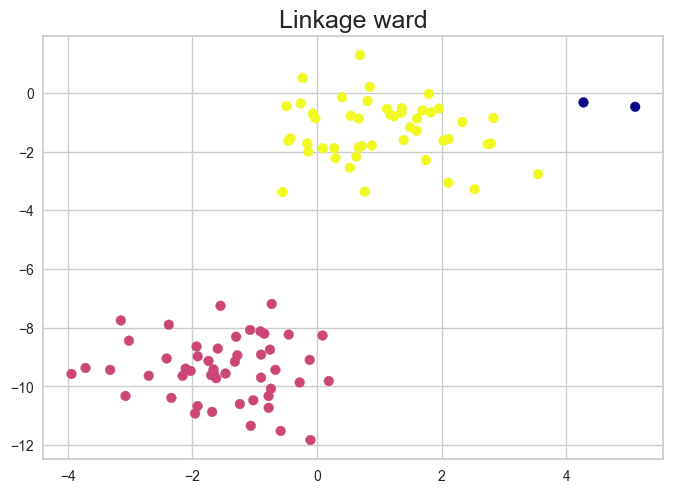

silhouettee score =0.65 


In [79]:
# challenge 1 
from sklearn.cluster import DBSCAN
# start coding here
dbs = DBSCAN(eps=1.5,min_samples=3,p=2,metric='minkowski')
dbs.fit(X)

# plot the data with the predicted labels using Hierarchical Clustering
plt.scatter(X[:,0], X[:,1], c = dbs.labels_, cmap='plasma')
plt.title("Linkage ward", fontsize=18)
plt.show()
print ('silhouettee score =%0.2f '% silhouette_score(X,dbs.labels_))

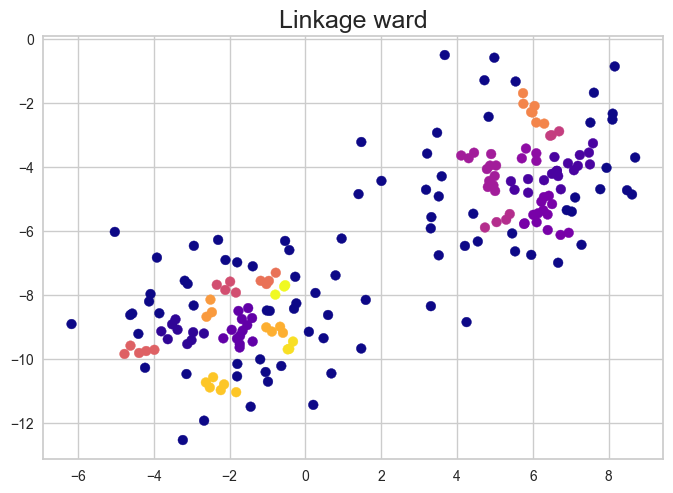

NameError: name 'labels' is not defined

In [84]:
# challenge 2 
Xbs, ybs = datasets.make_blobs (n_samples=200, centers =2, n_features=2, cluster_std=1.5, random_state=40)
dbs = DBSCAN(eps=0.5,min_samples=3,p=1,metric='minkowski')
dbs.fit(Xbs)
# start coding here
# plot the data with the predicted labels using Hierarchical Clustering
plt.scatter(Xbs[:,0], Xbs[:,1],  c = dbs.labels_, cmap='plasma')
plt.title("Linkage ward", fontsize=18)
plt.show()
print ('silhouettee score =%0.2f '% silhouette_score(Xbs, dbs.labels_))

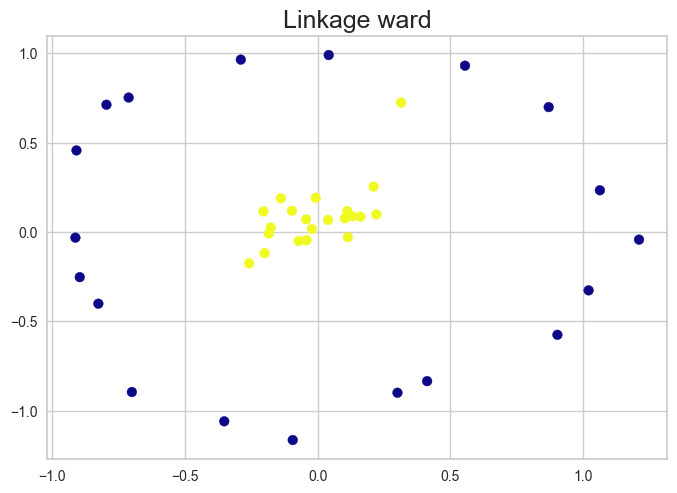

silhouettee score =0.27 


In [81]:
# challenge 3 
Xbs, ybs = datasets.make_circles(n_samples= 40,         
                                 noise=  0.1 ,   # a value (0 to 1): it sets how data points disturbed 
                                 factor= 0.1,    # a value btw (0 to 1): how far the inner data from the outer group
                                 shuffle=True, 
                                 random_state=2
                                 )
# start coding here
dbs = DBSCAN(eps=0.5,min_samples=10,p=2,metric='minkowski')
y  = dbs.fit(Xbs)
# start coding here
# plot the data with the predicted labels using Hierarchical Clustering
plt.scatter(Xbs[:,0], Xbs[:,1],  c = dbs.labels_, cmap='plasma')
plt.title("Linkage ward", fontsize=18)
plt.show()
print ('silhouettee score =%0.2f '% silhouette_score(Xbs, dbs.labels_))

**************

# Exercise 12 (Optional  real data)

Customer Personality Analysis including customer segmentation is an important practice a company wants to perform to improve future sales. This analysis helps in separating customers into groups that reflect customers with a common interest in each cluster. Moreover, it helps sales managers to modify products according to the distinct needs and behaviors of different types of customers. 
Kaggle maintains a marketing campaign dataset which we can use in this exercise to identify customer segmentation using clustering algorithms. The dataset may require further preprocessing and preparation to use all features available, however, for this exercise, we will select only those attributes that require nearly no or minimal preprocessing and can be used with Kmeans.

https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/data


### A good notebook to this exercise can be accessed from:
https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/notebook

In [53]:
# You can download the data from Kaggle, the link given above:
# load the data to pandas Dataframe
marketdata  = pd.read_csv('marketing_campaign.csv',  sep="\t")

FileNotFoundError: [Errno 2] No such file or directory: 'marketing_campaign.csv'

In [ ]:
# let's do minimal preprocessing
#1- check the dataset information
#2- remove all features that are not numerical
#3- check missing values, if many then remove that feature

In [ ]:
# check info
marketdata.info()

In [ ]:
# data basic stats
marketdata.describe()

In [ ]:
# let us remove IDs Education, and Marital_Status. Also remove those records without income
marketdata_smaller = marketdata.drop(['ID', 'Education', 'Marital_Status'], axis=1)

**the data removed above are important to  the problem, but for simplicity we removed them here**

In [ ]:
# drop na rows
marketdata_smaller.dropna(subset = ["Income"], inplace=True)

In [ ]:
# let us check how many samples we have now
marketdata_smaller.describe()

In [ ]:
# we can index the data using dates, let us format 
marketdata_smaller["Dt_Customer"] = pd.to_datetime(marketdata_smaller["Dt_Customer"])
marketdata_smaller.index = marketdata_smaller["Dt_Customer"]



In [ ]:
 # These info can be summarized as one feature 'Spent', you can check other extracted feature in the solution from kaggle
marketdata_smaller.iloc[:, 5:11]

In [ ]:
# let use create spent feature 
# this feature is the total spent on varius items
marketdata_smaller['spent'] = marketdata_smaller.iloc[:, 5:11].sum(axis=1)

In [ ]:
# let us remove raw data that are summarized to spent above 
marketdata_smaller= marketdata_smaller.drop(['Dt_Customer', 
                                             'MntWines', 
                                             'MntFruits',
                                             'MntMeatProducts',
                                             'MntFishProducts',
                                             'MntSweetProducts',
                                             'MntGoldProds'], axis=1)

In [ ]:
# let us slice a year of customer behavior
marketdata_smaller['2013-01-01': '2013-12-30']

In [ ]:
To_Plot = [ "Income", "Recency", "Year_Birth", "spent"]
marketdata_smaller[To_Plot]

In [ ]:
# There are many info in the dataset, let us pick a subset for this exercise and perform clustering

# We can detect outliers using various methods, may pairplot using seaborn library is a nice method 
# box plot and other methods can be used to conduct thorough denoising

import seaborn as sns
To_Plot = [ "Income", "Recency", "Year_Birth", "spent"]
data= marketdata_smaller[To_Plot]

# the indexing to avoid sns error due to repeated date indexing
data.index = range(0,len(marketdata_smaller))
plt.figure()
sns.pairplot(data, hue='Income')
plt.show()


over 600000 income seams outlier where we can remove them. also we can check year_birth or age to remove records that don't make sense

In [ ]:
# remove those records greater than 600K
data = data[(data['Income']<600000)]
len(data)

In [ ]:
plt.figure()
sns.pairplot(data, hue='Income')
plt.show()

## Clustering
we can perform clustering on the four features, but the big question how many clusters we should have?, then which clustering algorithm of the three methods we should use? Our exercise is to try the above three clustering algorithms on this dataset (**data**), and validating the results, to answer the questions in this exercise. 

In [ ]:
# Elbow method using Kmeans
# set a value for the list of k to be tested
klst = 10
# We already created a function to find wss using Kmeans
wss = Find_K_Kmeans(data, klst)  
# plot the wss and ks and figureout what is the optimal k ?
plt.plot(range(1,klst), wss)
plt.xlabel('number of clusters')
plt.ylabel('WSS')
plt.show()

In [ ]:
## optional
# # Curvature to determine the k- value https://www.delftstack.com/img/Numpy/curvature%20formula.png?ezimgfmt=rs:434x184/rscb5/ng:webp/ngcb5
# # first derivatives (velocity )
# klstd1_x = np.gradient(range(0,klst-1))
# klstd1_y = np.gradient(wss) 

# vel=np.array([ [klstd1_x[i], klstd1_y[i]] for i in range(klstd1_x.size)])

# #compute speed
# speed = np.sqrt(klstd1_x *klstd1_x + klstd1_y *klstd1_y)

# # tangent
# tangent = np.array([1/speed] * 2).transpose() * vel

# # compute the formula (second derivatives)
# ss_t = np.gradient(speed)
# xx_t = np.gradient(klstd1_x)
# yy_t = np.gradient(klstd1_y)

# # calculation of curvature from the typical formula
# curvature  = np.abs(xx_t * klstd1_y - klstd1_x * yy_t) / (klstd1_x*klstd1_x +  klstd1_y**2)**1.5

# plt.plot(range(1,klst), curvature)
# plt.xlabel('number of clusters')
# plt.ylabel('WSS')
# plt.show()

In [ ]:
# using a tool KElbowvisualizer 
vis = KElbowVisualizer(KMeans(), k=10)
vis.fit(data)
vis.show()
plt.show()

The elbow method tells has either 2 or 3 clusters can be formed in this dataset. We can check both for sure and further analysis has to be conducted with data domain experts to validate findings!

In [ ]:
# culstering results
kmeans = KMeans(n_clusters=2).fit(data)
y = kmeans.predict(data)
# clustering validation
print('Silhouette score %0.2f'%silhouette_score(data,y))

In [ ]:
# culstering results
kmeans = KMeans(n_clusters=3).fit(data)
y = kmeans.predict(data)
# clustering validation
print('Silhouette score %0.2f'%silhouette_score(data,y))

In [ ]:
# culstering results
kmeans = KMeans(n_clusters=5).fit(data)
y = kmeans.predict(data)
# clustering validation
print('Silhouette score %0.2f'%silhouette_score(data,y))

In general, positive Silhouette and above 50% is good clustering result

In [ ]:
# Elbow method using AC ( additional parameter - linkage)



In [ ]:
# DBSCAN method 




## Conclusions